In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import QuantileTransformer 
from sklearn.model_selection import train_test_split

In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with QuantileTransformer()

scaler = QuantileTransformer(random_state=0)
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [9]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [37]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((50), batch_input_shape=(None,5,1), return_sequences=True))
model.add(keras.layers.LSTM((1), activation = 'relu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 208       
Total params: 10,608
Trainable params: 10,608
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(148,5,1), y_train, epochs=1000, validation_data=(x_test.reshape(37,5,1), y_test))

Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 2s 13ms/sample - loss: 0.3692 - acc: 0.0000e+00 - val_loss: 0.7752 - val_acc: 0.0000e+00
Epoch 2/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.3344 - acc: 0.0000e+00 - val_loss: 0.7133 - val_acc: 0.0000e+00
Epoch 3/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.2957 - acc: 0.0000e+00 - val_loss: 0.6406 - val_acc: 0.0000e+00
Epoch 4/1000
148/148 [==============================] - 0s 411us/sample - loss: 0.2538 - acc: 0.0000e+00 - val_loss: 0.5487 - val_acc: 0.0000e+00
Epoch 5/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.2006 - acc: 0.0000e+00 - val_loss: 0.4240 - val_acc: 0.0000e+00
Epoch 6/1000
148/148 [==============================] - 0s 431us/sample - loss: 0.1387 - acc: 0.0000e+00 - val_loss: 0.2396 - val_acc: 0.0000e+00
Epoch 7/1000
148/148 [==============================] - 0s 425us/sample - loss: 

148/148 [==============================] - 0s 418us/sample - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 57/1000
148/148 [==============================] - 0s 371us/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0137 - val_acc: 0.0000e+00
Epoch 58/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 59/1000
148/148 [==============================] - 0s 317us/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 60/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 61/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 62/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0120 - val_a

Epoch 112/1000
148/148 [==============================] - 0s 357us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 113/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 114/1000
148/148 [==============================] - 0s 317us/sample - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 115/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0112 - val_acc: 0.0000e+00
Epoch 116/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 117/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 118/1000
148/148 [==============================] - 0s 330us/sample - loss: 0.0027 - acc: 0.0000e+00 - val

148/148 [==============================] - 0s 1ms/sample - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 168/1000
148/148 [==============================] - 0s 472us/sample - loss: 0.0043 - acc: 0.0000e+00 - val_loss: 0.0179 - val_acc: 0.0000e+00
Epoch 169/1000
148/148 [==============================] - 0s 418us/sample - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0145 - val_acc: 0.0000e+00
Epoch 170/1000
148/148 [==============================] - 0s 701us/sample - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0089 - val_acc: 0.0000e+00
Epoch 171/1000
148/148 [==============================] - 0s 647us/sample - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 172/1000
148/148 [==============================] - 0s 1ms/sample - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 173/1000
148/148 [==============================] - 0s 842us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0035 - val

148/148 [==============================] - 0s 384us/sample - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 223/1000
148/148 [==============================] - 0s 411us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 5.1212e-04 - val_acc: 0.0000e+00
Epoch 224/1000
148/148 [==============================] - 0s 357us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 225/1000
148/148 [==============================] - 0s 330us/sample - loss: 6.9870e-04 - acc: 0.0000e+00 - val_loss: 6.9544e-04 - val_acc: 0.0000e+00
Epoch 226/1000
148/148 [==============================] - 0s 350us/sample - loss: 7.5643e-04 - acc: 0.0000e+00 - val_loss: 8.0129e-04 - val_acc: 0.0000e+00
Epoch 227/1000
148/148 [==============================] - 0s 405us/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 228/1000
148/148 [==============================] - 0s 519us/sample - loss: 0.0019 - acc: 0.0000e+00 

148/148 [==============================] - 0s 330us/sample - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 278/1000
148/148 [==============================] - 0s 451us/sample - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0060 - val_acc: 0.0000e+00
Epoch 279/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 280/1000
148/148 [==============================] - 0s 357us/sample - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 281/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0052 - acc: 0.0000e+00 - val_loss: 0.0118 - val_acc: 0.0000e+00
Epoch 282/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0094 - val_acc: 0.0000e+00
Epoch 283/1000
148/148 [==============================] - 0s 317us/sample - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0098 -

148/148 [==============================] - 0s 357us/sample - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 333/1000
148/148 [==============================] - 0s 357us/sample - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 334/1000
148/148 [==============================] - 0s 330us/sample - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 335/1000
148/148 [==============================] - 0s 330us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 336/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 337/1000
148/148 [==============================] - 0s 351us/sample - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 338/1000
148/148 [==============================] - 0s 350us/sample - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0020 -

148/148 [==============================] - 0s 343us/sample - loss: 7.7933e-04 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 388/1000
148/148 [==============================] - 0s 378us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 389/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 390/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 391/1000
148/148 [==============================] - 0s 344us/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 392/1000
148/148 [==============================] - 0s 404us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 393/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 4.23

148/148 [==============================] - 0s 2ms/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 443/1000
148/148 [==============================] - 0s 1ms/sample - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 444/1000
148/148 [==============================] - 0s 964us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch 445/1000
148/148 [==============================] - 0s 1ms/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 446/1000
148/148 [==============================] - 0s 782us/sample - loss: 9.9225e-04 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 447/1000
148/148 [==============================] - 0s 1ms/sample - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0100 - val_acc: 0.0000e+00
Epoch 448/1000
148/148 [==============================] - 0s 2ms/sample - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0046 - val_a

148/148 [==============================] - 0s 957us/sample - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 4.4003e-04 - val_acc: 0.0000e+00
Epoch 498/1000
148/148 [==============================] - 0s 2ms/sample - loss: 9.9453e-04 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 499/1000
148/148 [==============================] - 0s 2ms/sample - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 500/1000
148/148 [==============================] - 0s 3ms/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 501/1000
148/148 [==============================] - 0s 2ms/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 502/1000
148/148 [==============================] - 0s 1ms/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 3.7444e-04 - val_acc: 0.0000e+00
Epoch 503/1000
148/148 [==============================] - 0s 377us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0028

148/148 [==============================] - 0s 330us/sample - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 3.2468e-04 - val_acc: 0.0000e+00
Epoch 553/1000
148/148 [==============================] - 0s 317us/sample - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 554/1000
148/148 [==============================] - 0s 364us/sample - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 555/1000
148/148 [==============================] - 0s 350us/sample - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 556/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 557/1000
148/148 [==============================] - 0s 303us/sample - loss: 7.9465e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 558/1000
148/148 [==============================] - 0s 317us/sample - loss: 8.4669e-04 - acc: 0.0000e+00 - val_lo

148/148 [==============================] - 0s 721us/sample - loss: 7.5183e-04 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 607/1000
148/148 [==============================] - 0s 317us/sample - loss: 6.5263e-04 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 608/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 609/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 610/1000
148/148 [==============================] - 0s 317us/sample - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0130 - val_acc: 0.0000e+00
Epoch 611/1000
148/148 [==============================] - 0s 330us/sample - loss: 0.0045 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 612/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 

Epoch 661/1000
148/148 [==============================] - 0s 303us/sample - loss: 7.0686e-04 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 662/1000
148/148 [==============================] - 0s 337us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 8.1604e-04 - val_acc: 0.0000e+00
Epoch 663/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 664/1000
148/148 [==============================] - 0s 391us/sample - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0143 - val_acc: 0.0000e+00
Epoch 665/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 666/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 667/1000
148/148 [==============================] - 0s 283us/sample - loss: 0.0011 - acc: 0.0000e+

148/148 [==============================] - 0s 310us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 716/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 717/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 718/1000
148/148 [==============================] - 0s 297us/sample - loss: 8.6127e-04 - acc: 0.0000e+00 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 719/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 720/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 4.9349e-04 - val_acc: 0.0000e+00
Epoch 721/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 

148/148 [==============================] - 0s 296us/sample - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 771/1000
148/148 [==============================] - 0s 296us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 772/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0065 - val_acc: 0.0000e+00
Epoch 773/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 774/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 775/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 776/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0065 -

148/148 [==============================] - 0s 317us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 826/1000
148/148 [==============================] - 0s 330us/sample - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 827/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 828/1000
148/148 [==============================] - 0s 323us/sample - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 829/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 5.4679e-04 - val_acc: 0.0000e+00
Epoch 830/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 831/1000
148/148 [==============================] - 0s 323us/sample - loss: 7.5436e-04 - acc: 0.0000e+00 - val_loss: 

Epoch 880/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 0.0095 - val_acc: 0.0000e+00
Epoch 881/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 882/1000
148/148 [==============================] - 0s 283us/sample - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 5.1636e-04 - val_acc: 0.0000e+00
Epoch 883/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0041 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 884/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 885/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 886/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0021 - acc: 0.0000e+00 -

148/148 [==============================] - 0s 297us/sample - loss: 0.0059 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 936/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.0059 - acc: 0.0000e+00 - val_loss: 0.0156 - val_acc: 0.0000e+00
Epoch 937/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 938/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0046 - acc: 0.0000e+00 - val_loss: 0.0158 - val_acc: 0.0000e+00
Epoch 939/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 7.0421e-04 - val_acc: 0.0000e+00
Epoch 940/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.1821e-04 - val_acc: 0.0000e+00
Epoch 941/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 

Epoch 990/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 991/1000
148/148 [==============================] - 0s 290us/sample - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0054 - val_acc: 0.0000e+00
Epoch 992/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0019 - acc: 0.0000e+00 - val_loss: 9.3499e-04 - val_acc: 0.0000e+00
Epoch 993/1000
148/148 [==============================] - 0s 297us/sample - loss: 6.3849e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 994/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 995/1000
148/148 [==============================] - 0s 310us/sample - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 996/1000
148/148 [==============================] - 0s 297us/sample - loss: 0.0020 - acc: 0.0000e+

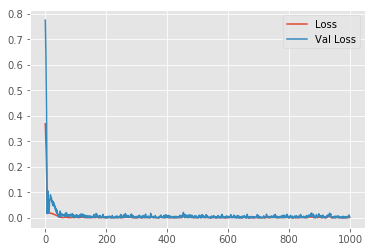

In [40]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [41]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [42]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.46764, 154.46631, 155.46475, 156.4629 , 157.46078, 158.4584 ,
       159.45576, 160.45284, 161.44963, 162.44612, 163.4423 , 164.43822,
       165.43379, 166.4291 , 167.42409, 168.41878, 169.41312, 170.40709,
       171.4008 , 172.39415, 173.38716, 174.37982, 175.37215, 176.36412,
       177.35574, 178.34697, 179.33784, 180.32837, 181.31848, 182.30821,
       183.2976 , 184.28659, 185.27519, 186.26335, 187.25116, 188.23851,
       189.22551], dtype=float32)

In [44]:
# adjusting predicited y_test values by rounding

np.round(scaler.inverse_transform(result).flatten())

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [45]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

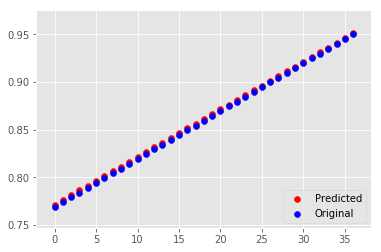

In [46]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

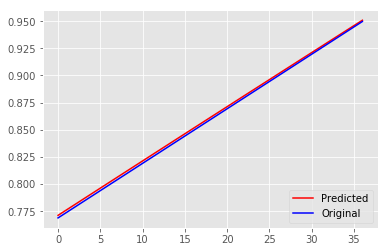

In [47]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [48]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [49]:
result_01

array([0.95583946, 0.96079487, 0.9657482 , 0.9706994 , 0.9756483 ,
       0.9805953 , 0.98553985, 0.9904821 , 0.9954222 , 1.0003603 ],
      dtype=float32)

In [50]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01.reshape(-1,1)).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [51]:
# look into original y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])

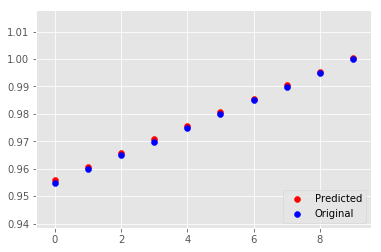

In [52]:
plt.style.use('ggplot')
plt.scatter(range(10), result_01, c='r', label="Predicted")
plt.scatter(range(10),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

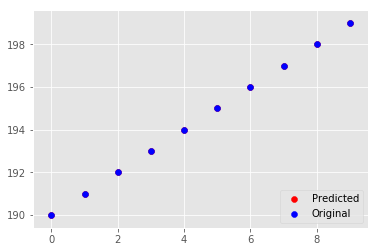

In [53]:
plt.style.use('ggplot')
plt.scatter(range(10), (np.round(scaler.inverse_transform(result_01.reshape(-1,1)))), c='r', label="Predicted")
plt.scatter(range(10),(scaler.inverse_transform(Y_test.reshape(-1,1))), c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()